## 調整畫布的佈景主題
調整畫布的佈景主題（theme）是讓視覺化立即改頭換面的捷徑，佈景主題涵蓋背景顏色、字型大小與線條樣式等整體外觀的調整。在 Python 
中我們可以查看 pyplot 的 style.available 屬性，暸解能夠使用哪些佈景主題。

In [1]:
import matplotlib.pyplot as plt

style_available = plt.style.available
print("可以使用 {} 個佈景主題。".format(len(style_available)))
print(style_available)

可以使用 26 個佈景主題。
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


其中 seaborn 相關、ggplot、dark_background、bmh 與 fivethirtyeight 等是較為鮮明的佈景主題，使用 plt.style.use() 方法
來指定，讓我們在這五個佈景主題中分別繪製長條圖探索 1995 至 1996 年球季中的芝加哥公牛隊陣容各個鋒衛位置的人數：

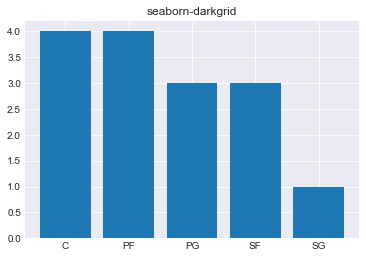

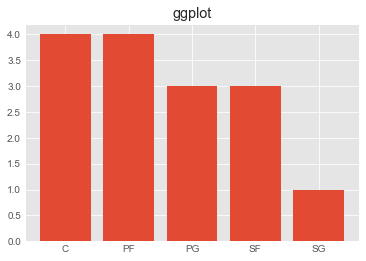

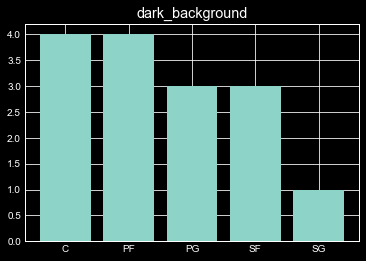

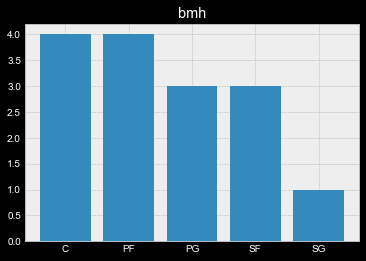

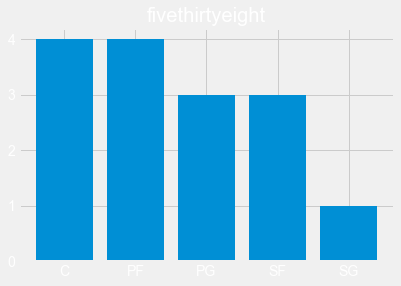

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")#使用groupby()方法可以將資料依照自己要的column分組
pos = grouped["Pos"].count()
plt_themes = ["seaborn-darkgrid", "ggplot", "dark_background", "bmh", "fivethirtyeight"]

for i in range(5):
  plt.style.use(plt_themes[i])
  plt.bar(range(1, 6), pos)
  plt.xticks(range(1, 6), pos.index)#设置坐标轴刻度
  plt.title(plt_themes[i])
  plt.show()
  print("\n")

## 加入圖標題與軸標籤
一個敘述得當的圖標題能夠為探索性分析帶來畫龍點睛的效果，在 Python 中利用 plt.title() 可以加入正常標題、 plt.suptitle() 
可以加入一個畫布更上方的置中標題，讓標題具有兩個層級，一個大標與一個副標；而 plt.xlabel() 與 plt.ylabel() 則可以分別為 X 軸
與 Y 軸加上變數名稱與單位的敘述

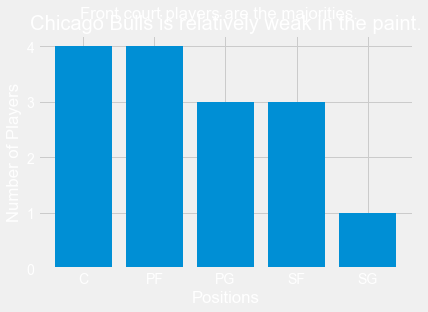

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()

plt.bar(range(1, 6), pos)
plt.xticks(range(1, 6), pos.index)
plt.suptitle("Front court players are the majorities.")
plt.title("Chicago Bulls is relatively weak in the paint.")
plt.xlabel("Positions")
plt.ylabel("Number of Players")
plt.show()

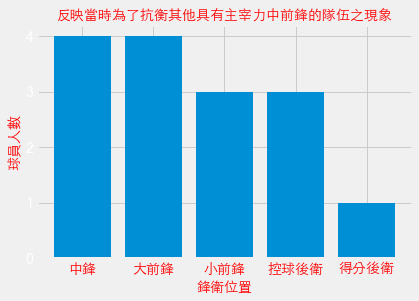

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()

# 可以顯示中文
myfont = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc")
plt.bar(range(1, 6), pos)
plt.xticks(range(1, 6), ["中鋒", "大前鋒", "小前鋒", "控球後衛", "得分後衛"], fontproperties=myfont ,c = 'r')
#plt.suptitle("前場球員為芝加哥公牛隊的大宗", fontproperties=myfont ,c = 'r')
plt.title("反映當時為了抗衡其他具有主宰力中前鋒的隊伍之現象", fontproperties=myfont ,c = 'r')
plt.xlabel("鋒衛位置", fontproperties=myfont , c = 'r')
plt.ylabel("球員人數", fontproperties=myfont ,c = 'r')
plt.show()

## 加入註釋
除了標準的圖標題與軸標籤能幫助資料科學團隊解讀探索性資料分析，我們還可以在繪圖中加入凸顯資訊的元件，像是用來註釋描述性資訊的文字、標註
重要數值的水平或垂直線、強調某區域的陰影或是指出特定資料點的箭頭等。在 Python 中可以使用 plt.text() 方法指定文字內容與擺放文字的
座標位置，像是將 1995 至 1996 年球季的芝加哥公牛隊各個鋒衛位置的平均每場得分長條圖上方加入得分的數值，特別注意的是擺放文字之位置要
做微幅調整，否則會造成註釋文字恰好貼齊長條或者座標軸的情況。

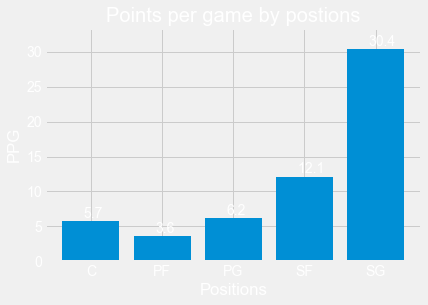

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)
df = pd.merge(player_info, per_game[["Name", "PTS/G"]], left_on="Player", right_on="Name")#進行資料合併
grouped = df.groupby("Pos")
points_per_game = grouped["PTS/G"].mean()

plt.bar([1, 2, 3, 4, 5], points_per_game)
plt.xticks([1, 2, 3, 4, 5], points_per_game.index)
plt.ylim(0, points_per_game.max() + 3)
plt.title("Points per game by postions")
plt.xlabel("Positions")
plt.ylabel("PPG")
for i, v in enumerate(points_per_game):
  plt.text(i + 0.9, v + 0.5, "{:.1f}".format(v))
plt.show()

使用 plt.axhline() 可以在圖形上加入水平線、使用 plt.fill_between() 能夠在指定區段加入陰影，藉此達成強調效果。像是我希望
在 Paul Pierce 每年場均得分的線圖上標註均值並且強調（高光）高於均值的區段。

/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


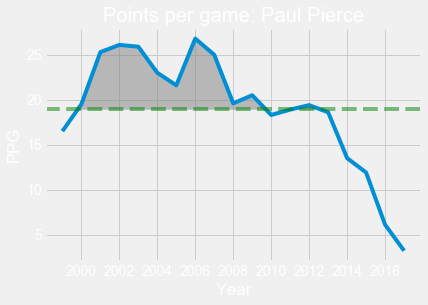

In [13]:
from pyquery import PyQuery as pq
import pandas as pd
import matplotlib.pyplot as plt

def get_pp_stats():
  """
  Get Paul Pierce stats from basketball-reference.com
  """
  stats_url = "https://www.basketball-reference.com/players/p/piercpa01.html"
  html_doc = pq(stats_url)
  pts_css = "#per_game .full_table .right:nth-child(30)"
  ast_css = "#per_game .full_table .right:nth-child(25)"
  reb_css = "#per_game .full_table .right:nth-child(24)"
  year = [str(i)+"-01-01" for i in range(1999, 2018)]
  pts = [float(p.text) for p in html_doc(pts_css)]
  ast = [float(a.text) for a in html_doc(ast_css)]
  reb = [float(r.text) for r in html_doc(reb_css)]
  df = pd.DataFrame()
  df["year"] = year
  df["pts"] = pts
  df["ast"] = ast
  df["reb"] = reb
  return df

pp_stats = get_pp_stats()
pp_stats["year"] = pd.to_datetime(pp_stats["year"])
pp_stats = pp_stats.set_index("year")
plt.plot(pp_stats["pts"]) # 線圖
avg_pts = pp_stats["pts"].mean() # 生涯均值
plt.axhline(y = avg_pts, color="g", ls="--", alpha = 0.5) # 水平線
plt.fill_between(pp_stats.index, avg_pts, pp_stats["pts"], 
                 where=pp_stats["pts"] >= avg_pts, color="gray",
                 alpha=0.5, interpolate=True) # 陰影
plt.title("Points per game: Paul Pierce")
plt.xlabel("Year")
plt.ylabel("PPG")
plt.show()

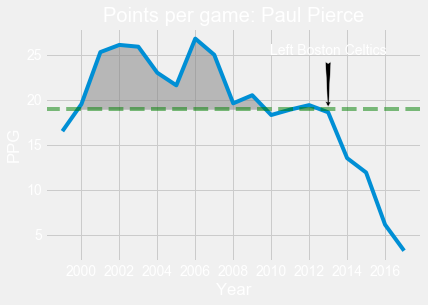

In [14]:
# 加上 plt.annotate() 函數就可以在圖形上增添箭號與註釋文字，例如我希望在圖上註釋 Paul Pierce 離開波士頓賽爾提克的 2013 年。
from pyquery import PyQuery as pq
import pandas as pd
import matplotlib.pyplot as plt

def get_pp_stats():
  """
  Get Paul Pierce stats from basketball-reference.com
  """
  stats_url = "https://www.basketball-reference.com/players/p/piercpa01.html"
  html_doc = pq(stats_url)
  pts_css = "#per_game .full_table .right:nth-child(30)"
  ast_css = "#per_game .full_table .right:nth-child(25)"
  reb_css = "#per_game .full_table .right:nth-child(24)"
  year = [str(i)+"-01-01" for i in range(1999, 2018)]
  pts = [float(p.text) for p in html_doc(pts_css)]
  ast = [float(a.text) for a in html_doc(ast_css)]
  reb = [float(r.text) for r in html_doc(reb_css)]
  df = pd.DataFrame()
  df["year"] = year
  df["pts"] = pts
  df["ast"] = ast
  df["reb"] = reb
  return df

pp_stats = get_pp_stats()
pp_stats["year"] = pd.to_datetime(pp_stats["year"])
pp_stats = pp_stats.set_index("year")
plt.plot(pp_stats["pts"]) # 線圖
avg_pts = pp_stats["pts"].mean() # 生涯均值
plt.axhline(y = avg_pts, color="g", ls="--", alpha = 0.5) # 水平線
plt.fill_between(pp_stats.index, avg_pts, pp_stats["pts"], 
                 where=pp_stats["pts"] >= avg_pts, color="gray",
                 alpha=0.5, interpolate=True) # 陰影

year_2013 = pp_stats.index[-5] # 2013 年的 index
# 加入箭號與註釋文字 https://www.itread01.com/content/1544608110.html
plt.annotate(
    'Left Boston Celtics',
    xy=(year_2013, 19),
    xycoords='data',
    xytext=(year_2013, 25),
    textcoords='data',
    horizontalalignment='center',
    arrowprops=dict(facecolor='black', arrowstyle="fancy")
)
plt.title("Points per game: Paul Pierce")
plt.xlabel("Year")
plt.ylabel("PPG")
plt.show()

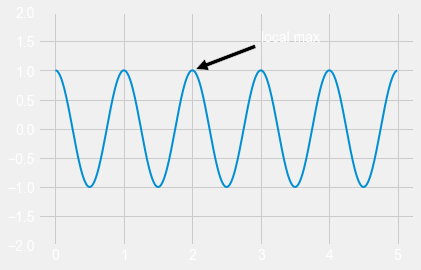

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 繪製一個餘弦曲線
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

# 繪製一個黑色，兩端縮排的箭頭
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            xycoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylim(-2, 2)
plt.show()

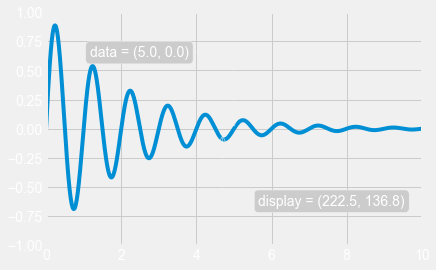

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 以步長0.005繪製一個曲線
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

# 被註釋點的資料軸座標和所在的畫素
xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

# 設定註釋文字的樣式和箭頭的樣式
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

# 設定偏移量
offset = 72
# xycoords預設為'data'資料軸座標，對座標點（5,0）添加註釋
# 註釋文字參考被註釋點設定偏移量，向左2*72points，向上72points
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

# xycoords以繪圖區左下角為參考，單位為畫素
# 註釋文字參考被註釋點設定偏移量，向右0.5*72points，向下72points
disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

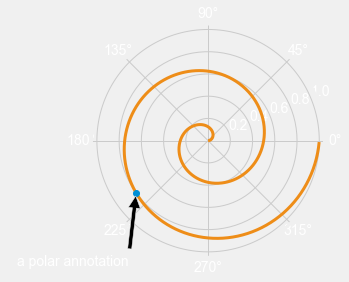

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製一個極地座標，再以0.001為步長，畫一條螺旋曲線
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

# 對索引為800處畫一個圓點，並做註釋
ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # 被註釋點遵循極座標系，座標為角度和半徑
            xytext=(0.05, 0.05),    # 註釋文字放在繪圖區的0.05百分比處
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),# 箭頭線為黑色，兩端縮排5%
            horizontalalignment='left',# 註釋文字的左端和低端對齊到指定位置
            verticalalignment='bottom',
            )
plt.show()

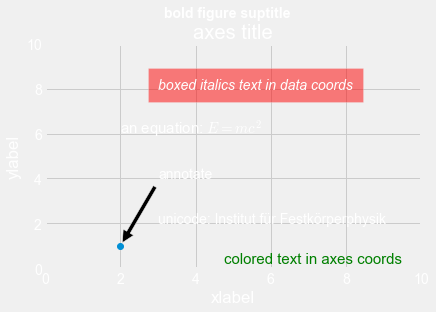

In [18]:
# 不同樣式的註釋文字示例
import matplotlib.pyplot as plt

# 設定繪圖區標題
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# 設定子繪圖區標題
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

# 設定x y座標軸的標識
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 紅色、透明度0.5、邊框留白10
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# 文字中有數學公式
ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# 文字中有ASCII碼
ax.text(3, 2, 'unicode: Institut f\374r Festk\366rperphysik')

# 轉換座標系
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

# 在2,1處畫個圓點，添加註釋
ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

## 加入與調整圖例
圖例（Legends）顯示資料如何映射至顏色或樣式。在 Python 中我們使用 plt.legend() 加入與調整圖例，像是將 1995 至 1996 年球季中的
芝加哥公牛隊陣容各個鋒衛位置的人數區分為前場和後場兩種顏色的長條

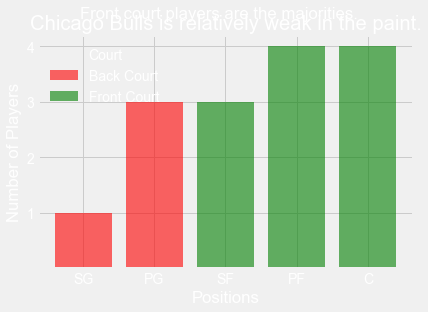

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped.count()
bar_1 = pos["Player"].loc[["SG", "PG"]].values
bar_2 = pos["Player"].loc[["SF", "PF", "C"]].values
plt.bar(range(1, 3), bar_1, label="Back Court", alpha=0.6, color="red")
plt.bar(range(3, 6), bar_2, label="Front Court", alpha=0.6, color="green")
plt.legend(title = "Court" ,loc = 'best') # 加入圖例 可以用0~10標示位置
plt.xticks(range(1, 6), ["SG", "PG", "SF", "PF", "C"]) # 調整 X 軸刻度線與刻度線標籤
plt.yticks(range(1, 5)) # 調整 Y 軸刻度線與刻度線標籤
plt.suptitle("Front court players are the majorities.")
plt.title("Chicago Bulls is relatively weak in the paint.")
plt.xlabel("Positions")
plt.ylabel("Number of Players")
plt.show()